# Aula 22 - regressão linear e outros fundamentos

Na aula de hoje, vamos explorar os seguintes tópicos:

- 1) Introdução
- 2) Regressão linear simples
- 3) Avaliação de modelos de regressão
- 3) Regressão linear múltipla
- 4) Overfitting: um dos lados do tradeoff viés-variância

### Problema gerador: como precificar uma casa?

Você foi contratado como cientista de dados de uma grande imobiliária, e seu primeiro trabalho será criar alguma solução capaz de precificar casas a partir de seus atributos. Naturalmente, este é um problema importantíssimo para o seu negócio. Como resolvê-lo?

<img src="https://cdn-icons-png.flaticon.com/512/69/69901.png" width=300>

____
____
____

## 1) Introdução

Para precificar casas, há, essencialmente, três opções:

> Você pode solicitar a avaliação de um corretor de imóveis especializado (contando com a experiência dele);

> Você pode construir um modelo teórico que relaciona as características da casa (e todas as outras variáveis relevantes) com seu preço;

> Você pode construir um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, é capaz de fornecer uma relação quantitativa entre os atributos e o preço.

Neste curso, seguiremos com a terceira opção. E para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a **Regressão Linear!**
____

Se vamos utilizar ML, o mais importante insumo são **dados**. Felizmente, temos à nossa disposição um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **79 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target** (`SalePrice`), que é o preço pelo qual cada casa foi vendida.

Por termos o target disponível, estamos trabalhando com um problema de **aprendizagem supervisionada**.

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/house_prices.csv")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


> Para casa: faça uma EDA exaustiva. Conheça os dados!!

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.select_dtypes(exclude=np.number)  #excluindo colunas numericas

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df["SalePrice"].mean()

180921.19589041095

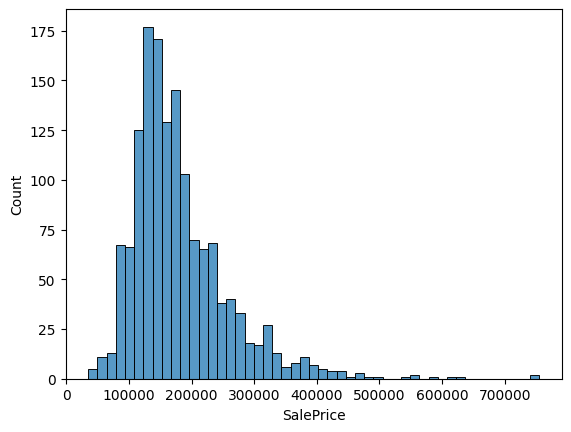

In [ ]:
sns.histplot(data=df, x="SalePrice");

___
___
___

## 2) Regressão linear simples

Vamos começar simples. E o modelo mais simples que podemos ter (utilizando alguma feature) é um que determina uma **relação linear entre uma única variável e o preço**, não é mesmo?

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona `y` (o preço da casa) e `X` (um único atributo da casa).

Por utilizarmos **apenas um atributo**, temos uma **Regressão Linear Simples**, e nosso modelo será:

$$ \hat{y} = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes (ou **parâmetros**) a serem determinados: $b_0$ (intercepto ou coeficiente linear) e $b_1$ (coeficiente angular).

A primeira pergunta será, então: **qual variável vamos escolher como nossa única feature?**

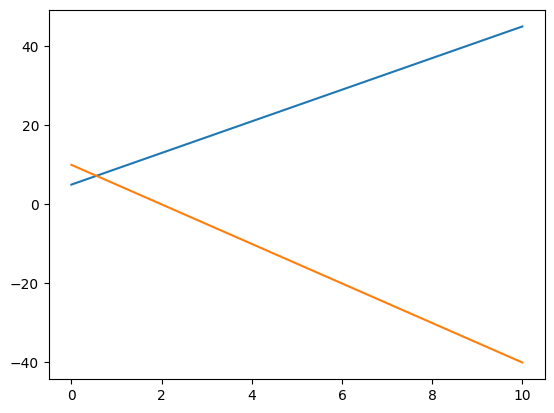

In [ ]:
b0, b1 = 5, 4
x = np.linspace(0, 10, 2)
y = b0 + b1*x

plt.plot(x, y)


b0, b1 = 10, -5
x = np.linspace(0, 10, 2)
y = b0 + b1*x

plt.plot(x, y);

____________

Antes de prosseguirmos, um ponto importante:

> Como nosso objetivo final será construir um modelo de ML, é importante que **absolutamente tudo** que, de uma forma ou de outra, direciona a construção do modelo seja feito **apenas com os dados de treino**. Por isso, a primeira coisa que faremos será separar nossa base em dados de treino e de teste.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg">

Começando separando o target das demais variáveis na base (que poderão ser utilizadas como **features** ou **variáveis preditoras**.

In [ ]:
X = df.drop(columns="SalePrice")  # excluindo a coluna target ou seja, todo o resto do dataset esta nessa variavel X
y = df["SalePrice"] # nosso target, ou seja, somente a coluna de preço de venda

Aí, usamos a função `train_test_split` da biblioteca `sklearn`:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# de 1460 linhas e vou usar 20% de teste, deixa um pouco mais nos dados de treino! # seed aleatoria separa a linha de maneira aleatoria

In [ ]:
X_train.shape #linhas e colunas 0, 1

(1168, 80)

In [ ]:
X.shape[0]

1460

In [ ]:
X_train.shape[0]/X.shape[0]

0.8

In [ ]:
X_test.shape[0]/X.shape[0]

0.2

In [ ]:
X_test  #292 linhas de teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,RM,50.0,5925,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
802,803,60,RL,63.0,8199,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal


In [ ]:
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
y_test

,SalePrice
892,154500
1105,325000
413,115000
522,159000
1036,315500
...,...
479,89471
1361,260000
802,189000
651,108000


In [ ]:
X_train.select_dtypes(include=np.number).columns #so as colunas numericas

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

A partir de agora, as variáveis de teste vão pra gaveta (depois veremos como utilizá-las, e sua enorme importância), e trabalharemos apenas com as variáveis de treino!

Vamos começar calculando a correlação entre as potenciais features (numéricas) e o target:

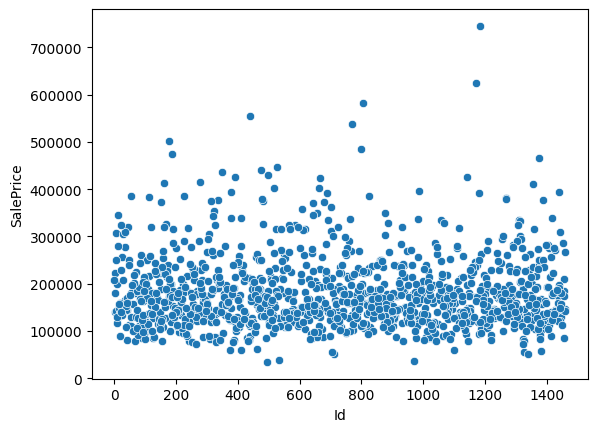

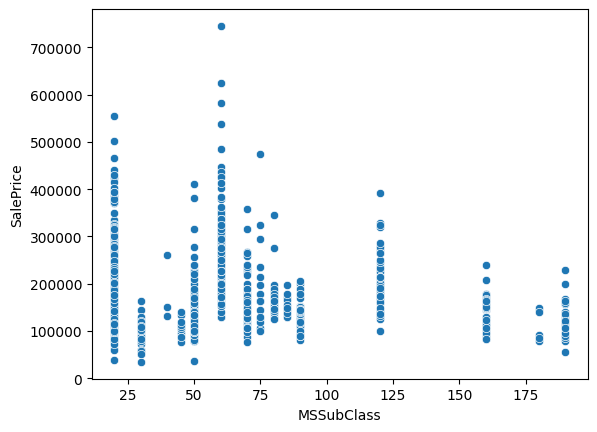

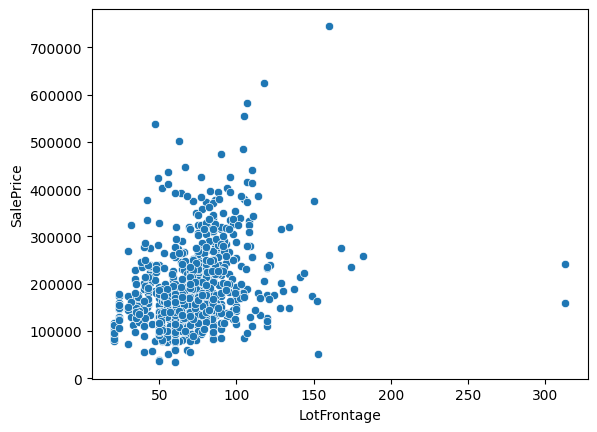

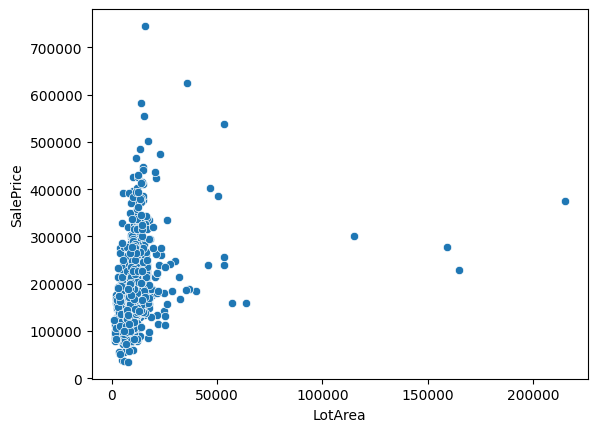

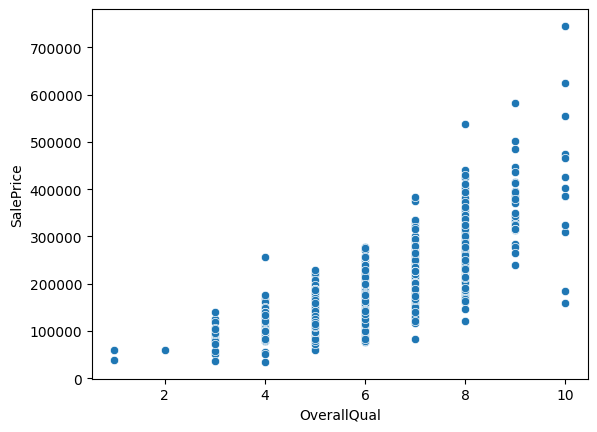

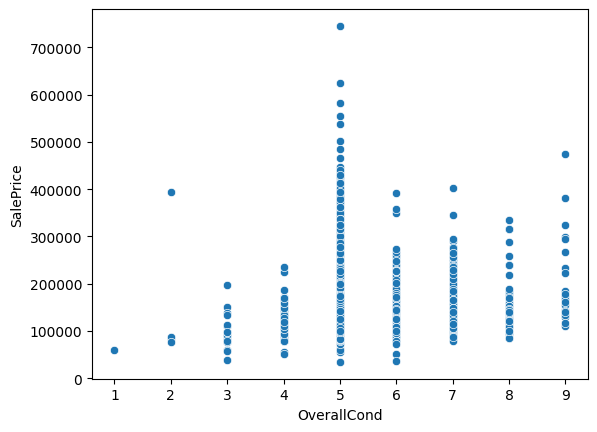

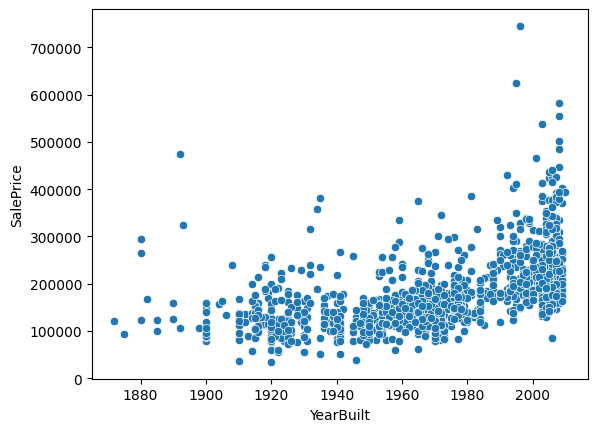

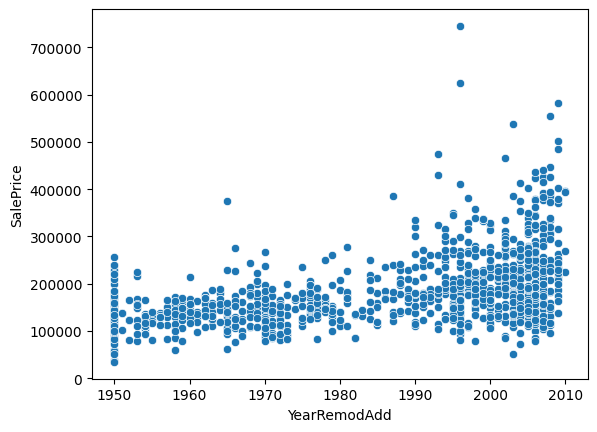

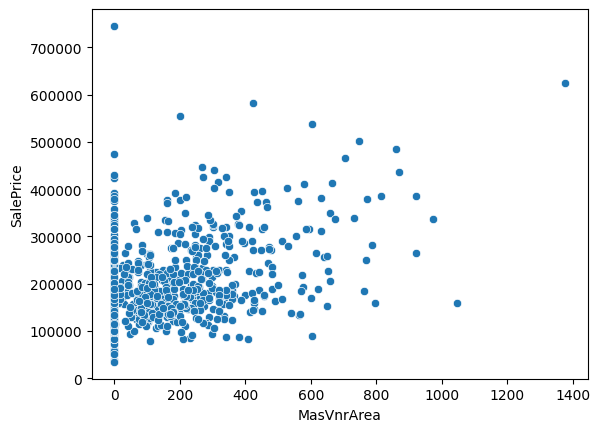

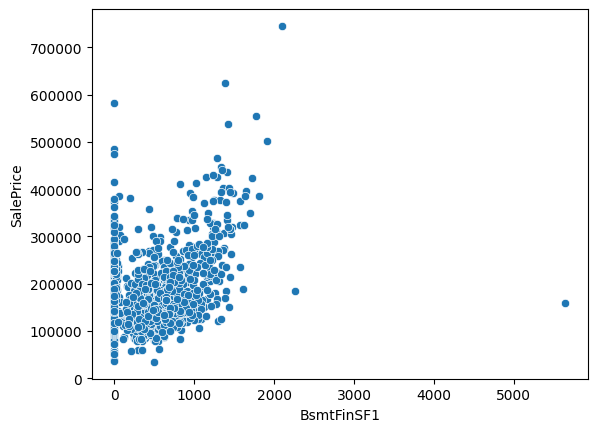

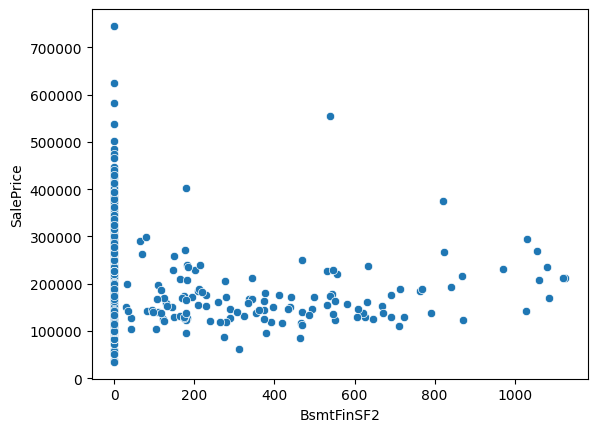

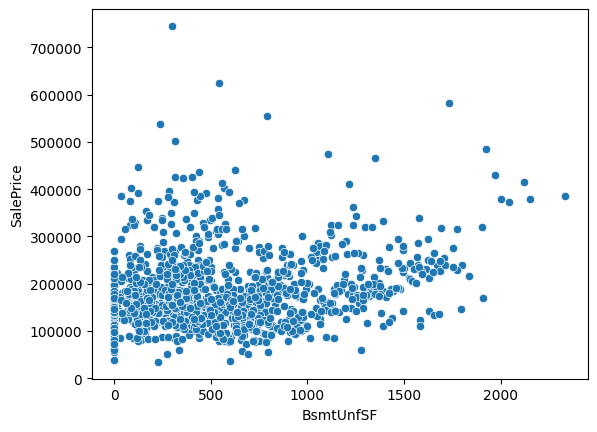

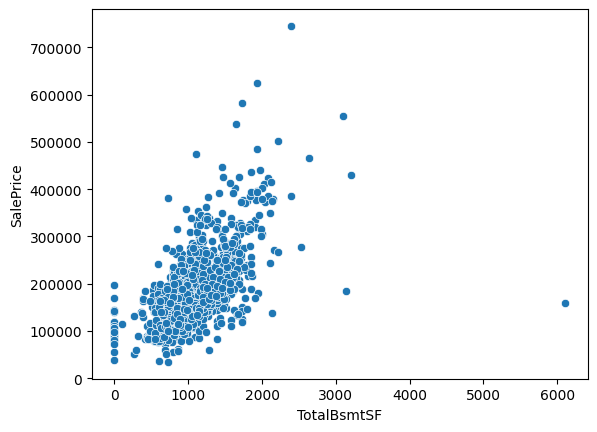

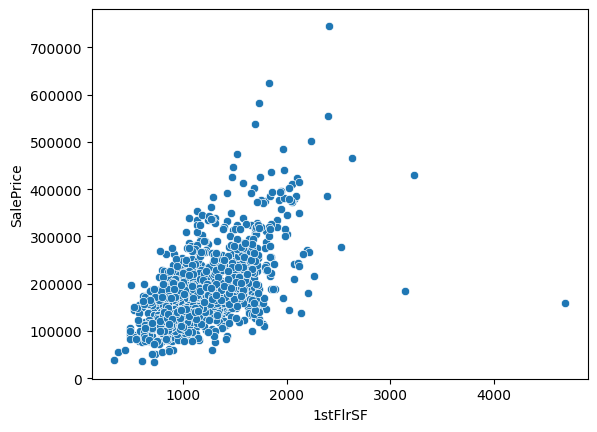

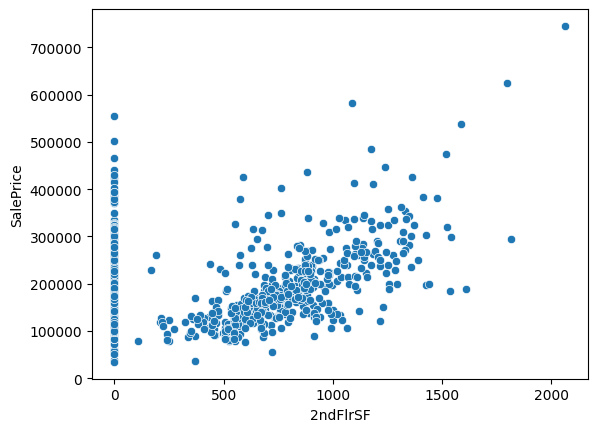

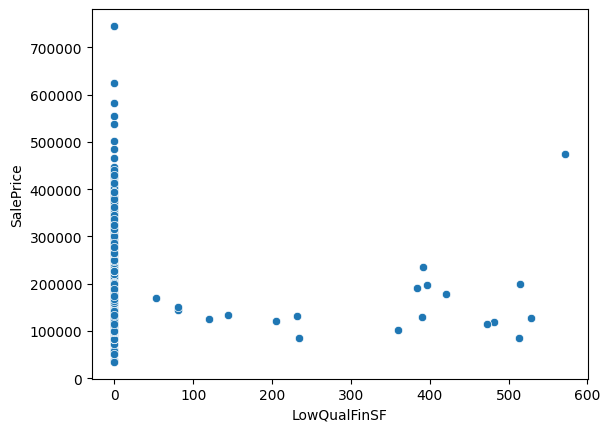

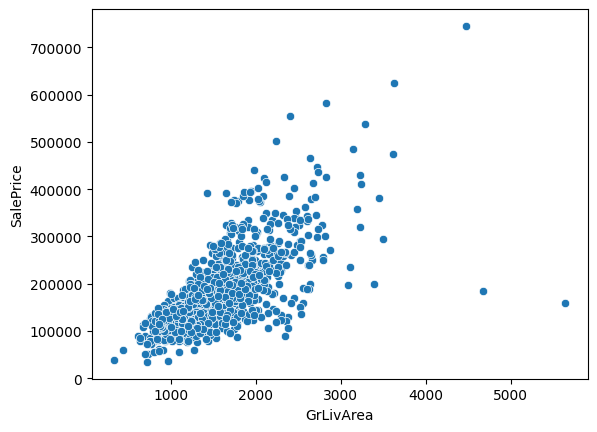

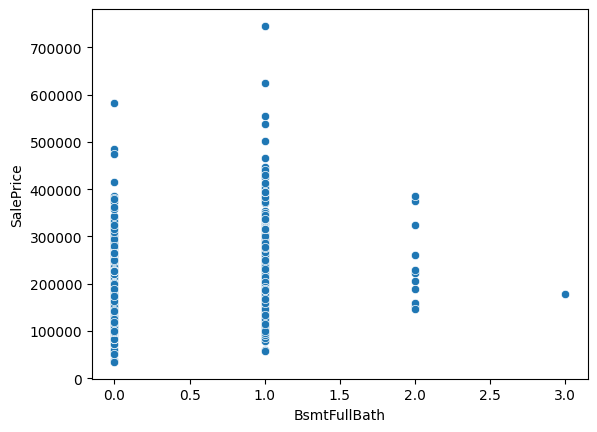

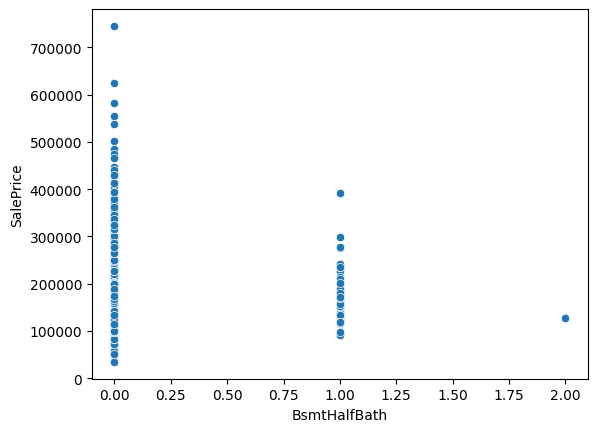

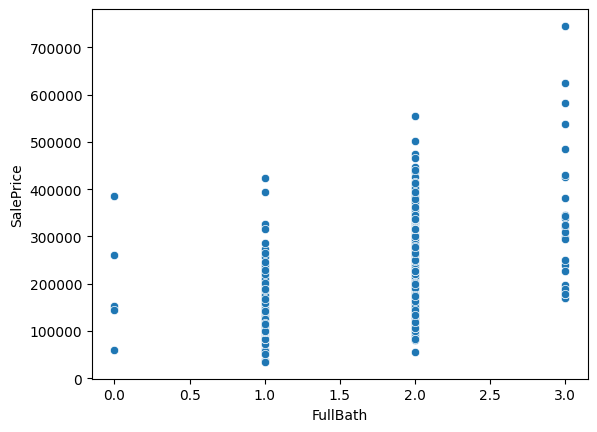

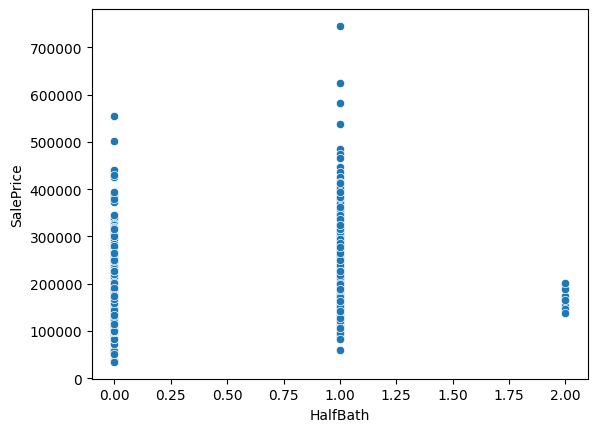

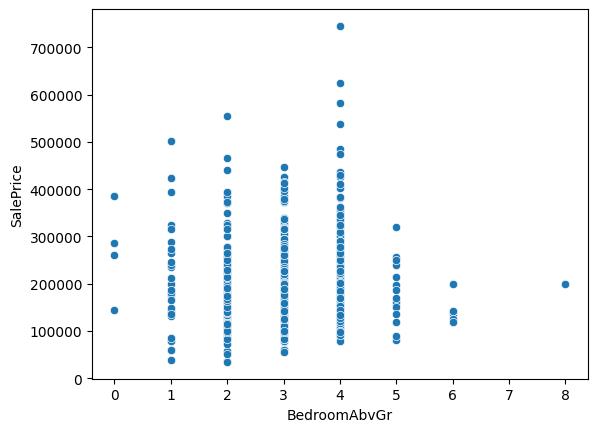

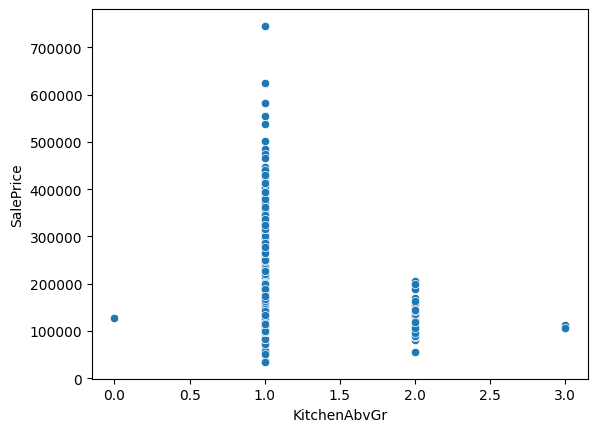

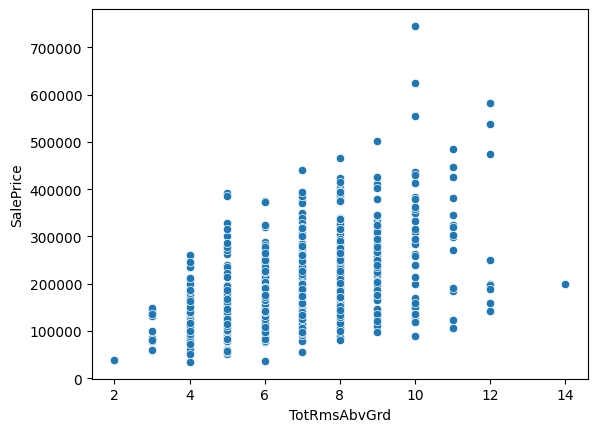

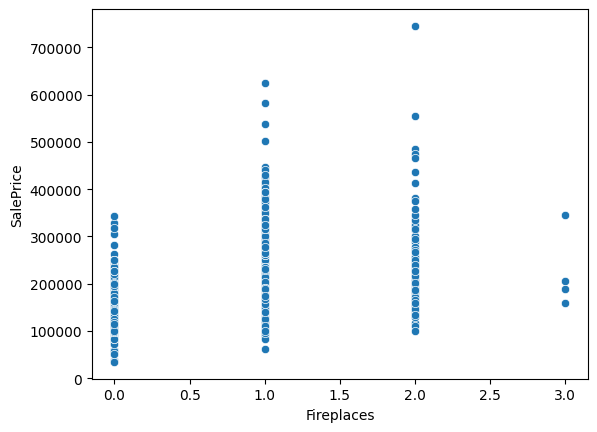

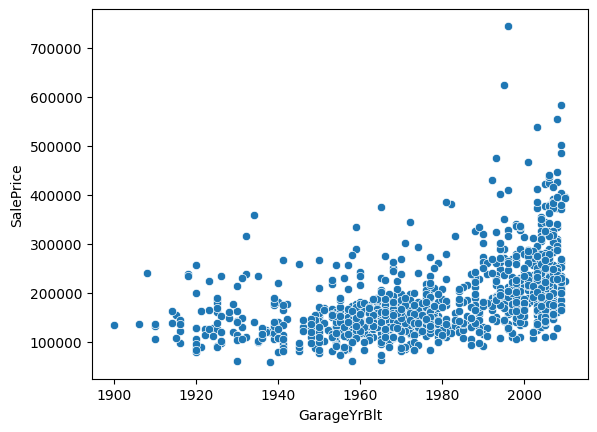

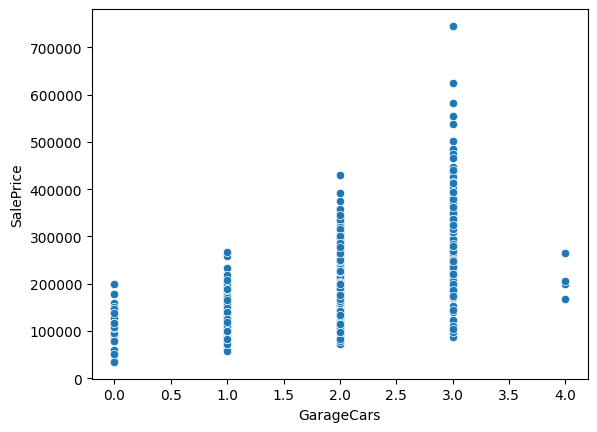

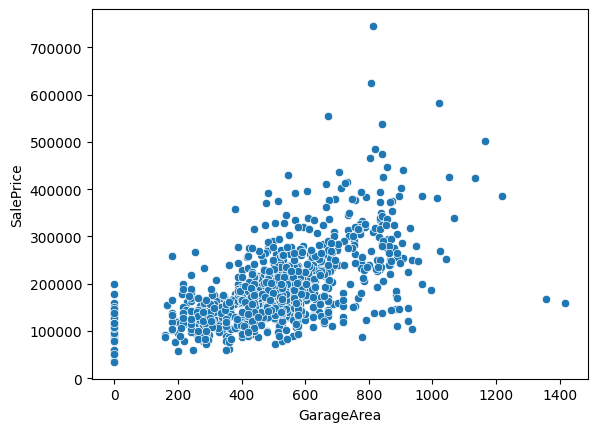

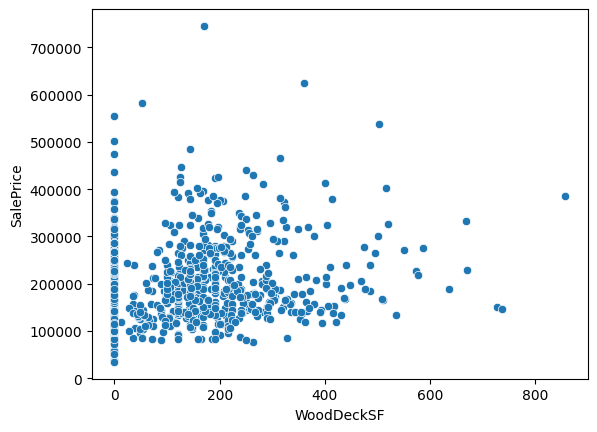

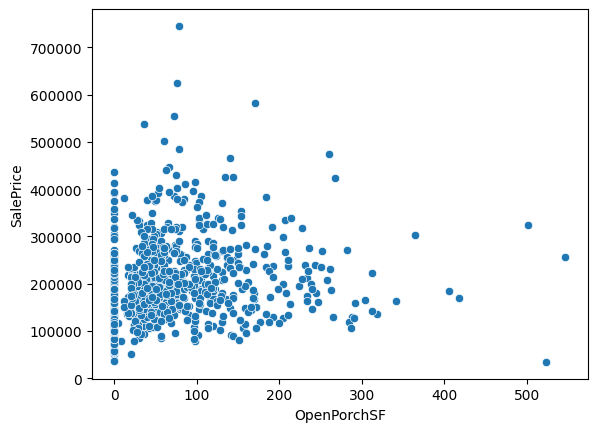

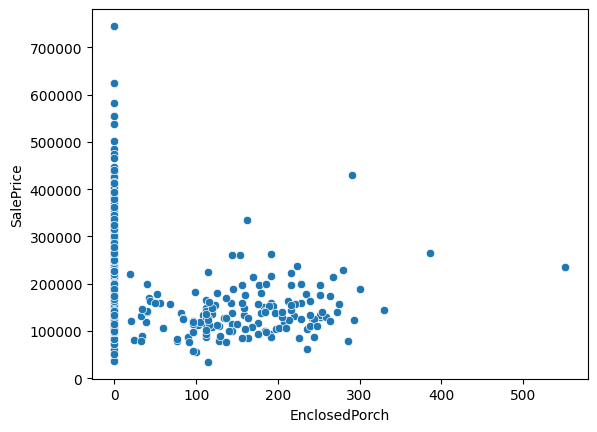

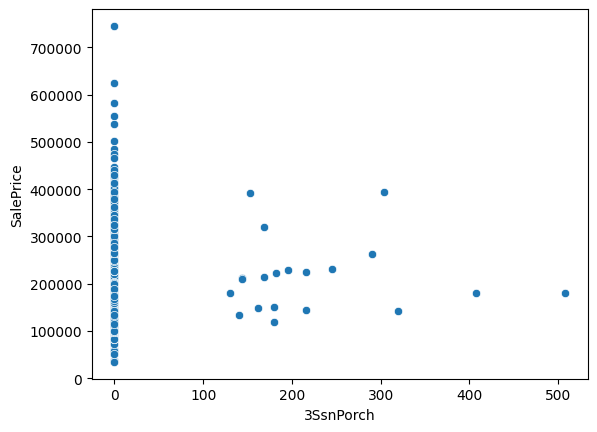

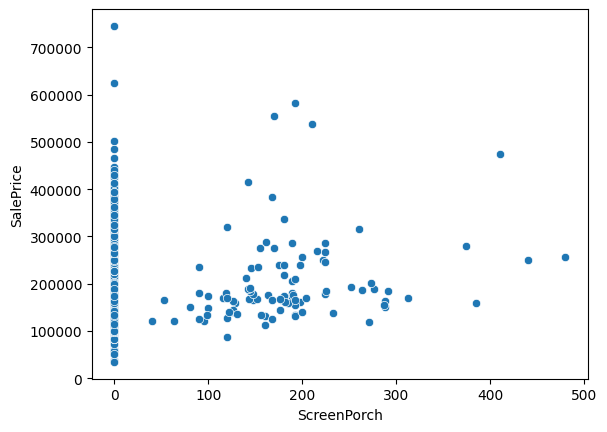

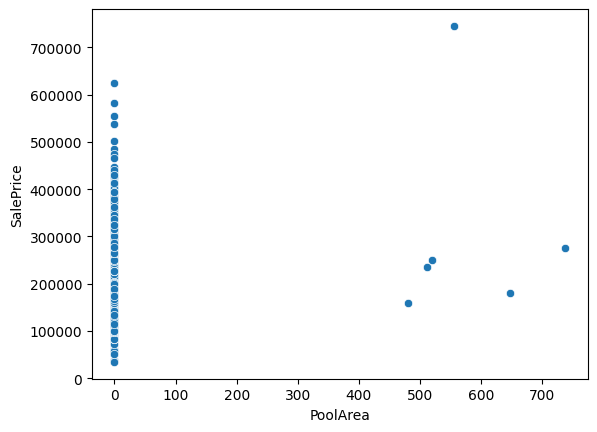

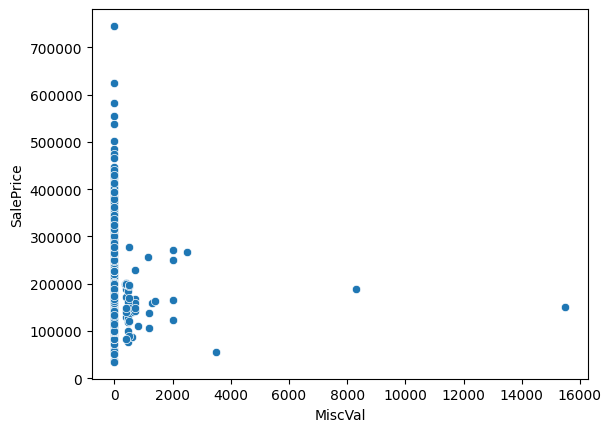

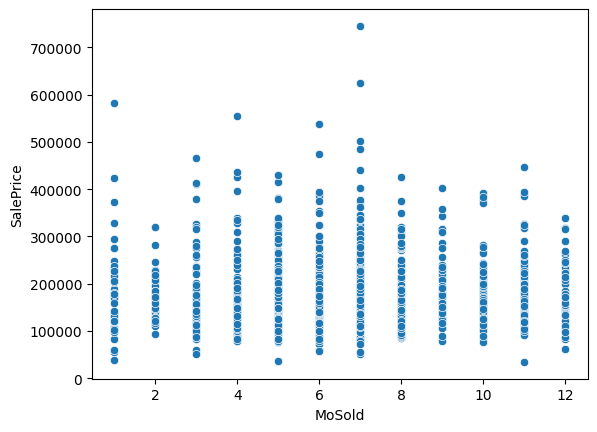

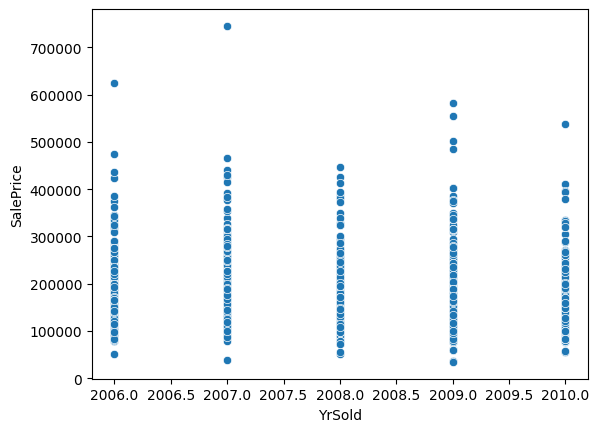

In [ ]:
for feature_candidata in X_train.select_dtypes(include=np.number).columns:

    sns.scatterplot(data=X_train, x=feature_candidata, y=y_train) #grafico de dispersão
    plt.show()

Vamos inspecionar as variáveis com maior correlação com o target:

In [ ]:
# Convert non-numerical columns to numerical using one-hot encoding
X_train_encoded = pd.get_dummies(X_train)

# Concatenate the encoded features with the target variable
corr_target = pd.concat([X_train_encoded, y_train], axis=1).corr()["SalePrice"] #concatenando lado a lado com o axis=1, o target vai la pra ultima coluna, usando a feature com maior correlação visual e o nosso target e seprando em um df
# corr é a correlação de Pearson

In [ ]:
corr_target[corr_target.abs().sort_values(ascending=False).index] # usando valores absolutos, ordenando e armazenando no index pra permacener com os sinais

,SalePrice
SalePrice,1.000000
OverallQual,0.785555
GrLivArea,0.695652
GarageCars,0.640991
GarageArea,0.624139
...,...
Foundation_Stone,-0.002416
Fence_GdPrv,0.002171
Condition1_RRNe,0.002107
GarageCond_Gd,-0.001725


In [ ]:
corr_target[corr_target.abs().sort_values(ascending=False).index].iloc[1:4]

,SalePrice
OverallQual,0.785555
GrLivArea,0.695652
GarageCars,0.640991


In [ ]:
corr_target[corr_target.abs().sort_values(ascending=False).index].iloc[1:4].index  # pegando só o top 3 de mais correlações

Index(['OverallQual', 'GrLivArea', 'GarageCars'], dtype='object')

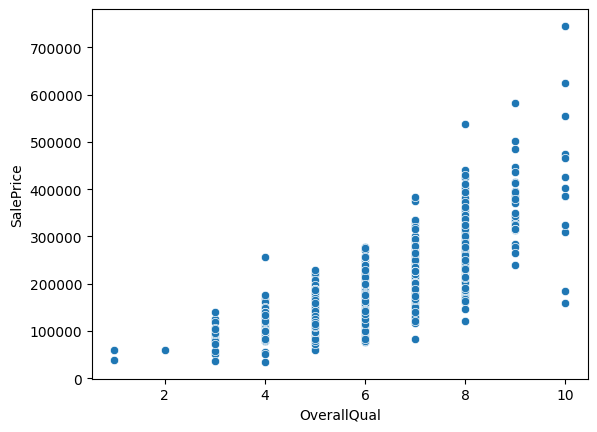

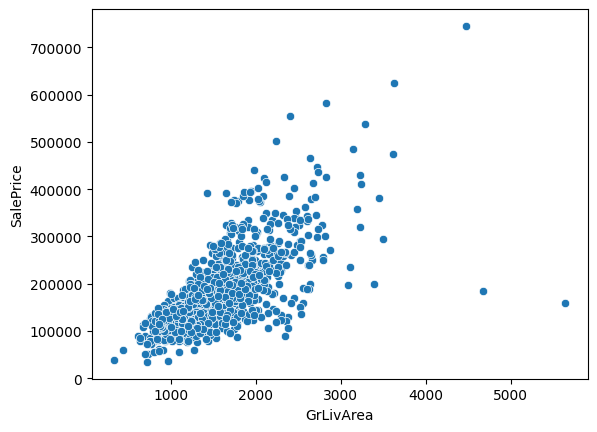

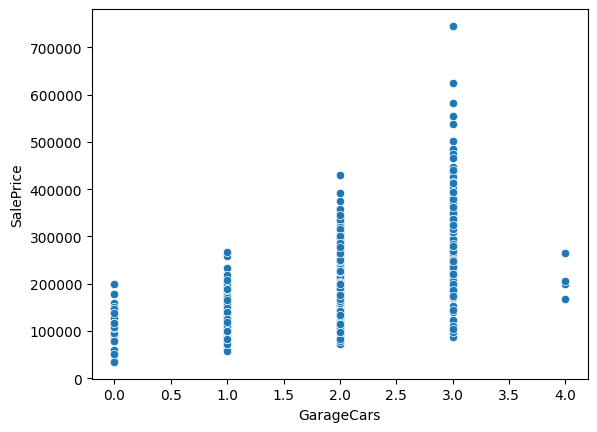

In [ ]:
for col in corr_target[corr_target.abs().sort_values(ascending=False).index].iloc[1:4].index:  #usando o top3 pra ver qual a que tem mais correlação visualmente

    sns.scatterplot(x=X_train[col], y=y_train)
    plt.show()

Parece que a variável de área construída (`GrLivArea`) é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Ou, melhor dizendo: **a variável `GrLivArea` parece estar relacionada ao target `SalePrice` linearmente!**

Mas note que há claramente dois outliers...

Vamos retirá-los (para fins pedagógicos - lembre-se de tentar entender a razão dos outliers!)

In [ ]:
X_train.query("GrLivArea > 4500").index  # buscando os outliers

Index([523, 1298], dtype='int64')

In [ ]:
index_drop = X_train.query("GrLivArea > 4500").index # armazenando na variavel index_drop pra apagar depois
index_drop

Index([523, 1298], dtype='int64')

In [ ]:
X_train = X_train.drop(index=index_drop)   # apagando eles

In [ ]:
y_train = y_train.drop(index=index_drop)  # faz a mesma coisa com o y_train onde estão as variaveis do target

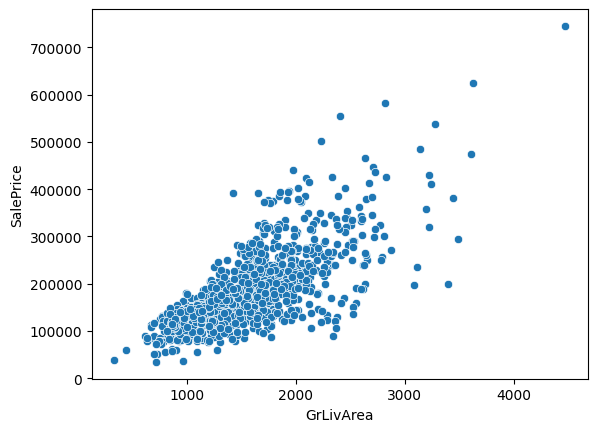

In [ ]:
sns.scatterplot(x=X_train["GrLivArea"], y=y_train)
plt.show()

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável `GrLivArea` para predizer o preço!

Sabemos que nosso modelo será uma reta. Mas a pergunta é: **qual reta**? De fato, existem infinitas retas possíveis!

`!pip install ipywidgets`
`!jupyter nbextension enable --py --sys-prefix widgetsnbextension`

Se não funcionar imediatamente, recarregue o Notebook!

In [ ]:
!pip install ipywidgets  # instalando biblioteca de graficos

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
X_train["GrLivArea"].min(), X_train["GrLivArea"].max()  # oegando o menor e o maior valor do df

(334, 4476)

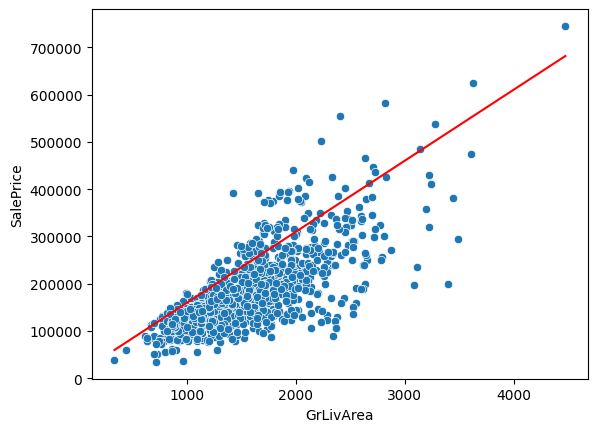

In [ ]:
sns.scatterplot(x=X_train["GrLivArea"], y=y_train)

b0, b1 = 10000, 150    # mudando os valores manualmente pra ver qual reta se aproxima mais dos gráficos
x = np.linspace(X_train["GrLivArea"].min(), X_train["GrLivArea"].max(), 2)  # plotando os valores no grafico
y = b0 + b1*x
plt.plot(x, y, color="red")

plt.show()

In [ ]:
import ipywidgets    # biblioteca de gráfico interativo

def plot(b0, b1):

    sns.scatterplot(x=X_train["GrLivArea"], y=y_train)

    x = np.linspace(X_train["GrLivArea"].min(), X_train["GrLivArea"].max(), 2)
    y = b0 + b1*x
    plt.plot(x, y, color="red")

    plt.show()

ipywidgets.interact(plot, b0=(0, 100000, 20000), b1=(-300, 300, 10))  # valores para o gráfico interagir

interactive(children=(IntSlider(value=40000, description='b0', max=100000, step=20000), IntSlider(value=0, des…

<function __main__.plot(b0, b1)>

Para determinarmos a reta de melhor ajuste, utilizamos o **algoritmo de aprendizagem da regressão linear**.

A intuição por trás do algoritmo de aprendizagem é muito simples:

> Desejamos encontrar a reta que melhor se ajusta aos dados, isso é, a reta que dá **o menor erro médio entre os valores preditos e os valores reais do target**.

<img src=https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png width=400>

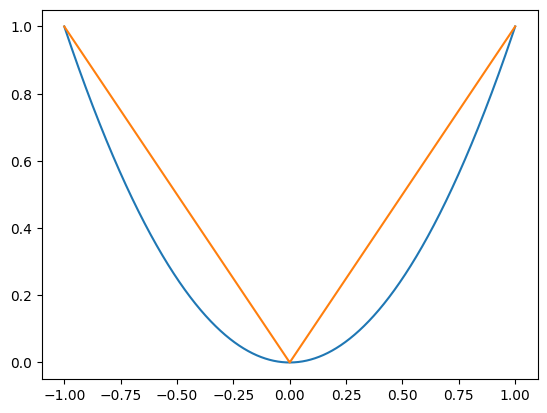

In [ ]:
x = np.linspace(-1, 1, 100000)

plt.plot(x, x**2)
plt.plot(x, np.abs(x));

Matematicamente, introduzimos a **função de perda**, que nada mais é que uma função que contabiliza **os erros cometidos pelo modelo**.

E para sabermos o quanto um modelo está errando é muito simples: basta **compararmos o target predito $\hat{y}$ com o target real $y$**!

Isso pode ser feito de muitas maneiras. A "maneira" específica é o que determina a relação funcional da função de custo de interesse. Para regressão linear, a função de perda mais comum é o **erro quadrático (squared error)**:

$$\text{SE}= (y_i-\hat{y}_i)^2 = (y_i - (b_0 + b_1 X_i))^2$$

Onde $i = 1, 2, \cdots, n$ é um índice que identifica cada uma das $n$ observações de treino.

Obs.: se tomarmos a média do SE em toda a base de treino, temos o **Mean Squared Error** (MSE):

$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> Quando tomamos a função de erro para uma única observação, a chamamos de **função de perda**. Quando tomamos sua média sobre todo o dataset, a chamamos de **função de custo**. Na prática, os termos são usados como sinônimos (e, pro problema matemático a ser resolvido, tanto faz também).

Uma vez que temos uma função de custo, nosso objetivo passa a ser **minimizá-la**. E isso faz total sentido: queremos que nosso modelo, após ter "aprendido", erre o mínimo possível!

Por isso, naturalmente caímos em um **problema de otimização**.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*b1zIkuw0XZb2TIgbYrDZEA.gif" width=700>

Note, no entanto, que **cada reta é unicamente determinada pelos valores dos parâmetros $b_0$ e $b_1$!**

Assim, podemos dizer que:

> O algoritmo de aprendizagem determina ("aprende") **os valores dos parâmetros** que produzem **a reta de melhor ajuste aos dados de treino**, ao otimizar a função de custo com relação aos parâmetros!

Existe uma forma muito conhecida e natural para resolvermos problemas de otimização como este: o famoso "deriva e iguala a 0".

E é exatamente o que o método OLS (*ordinary least squares*, ou então **"Método dos Mínimos Quadrados (MMQ)"**) nos dá: através da otimização explícita da função de custo quadrática, temos uma expressão analítica para os parâmetros:

$$ \left\{\begin{matrix}
\frac{\partial \mathcal{L}}{\partial b_0} = 0\\
\frac{\partial \mathcal{L}}{\partial b_1} = 0
\end{matrix}\right.
\Rightarrow
\left\{\begin{matrix}
\hat{b}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}\\
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}
\end{matrix}\right. \ ,
$$

onde: $\bar{x} = \frac{1}{n} \sum_i x_i$ e $\bar{y} = \frac{1}{n} \sum_i y_i$, são os valores médios da feature e target, respectivamente.

Para quem quiser saber detalhes sobre o procedimento acima, sugiro as referências citadas, ou então [este artigo super simples](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf).

E esse é o algoritmo de aprendizagem da regressão linear!

_________

> ### Passo 1 - construção do modelo

Felizmente, não precisamos implementar este algoritmo na mão (embora, caso queira, fique à vontade! É um ótimo exercício!)

Aqui na aula, usaremos o sklearn para isso!

Vamos começar?

In [ ]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [ ]:
X_train_1d = X_train["GrLivArea"]  # uma feature, uma dimensão, esse que vou usar pra treinar no modelo

In [ ]:
X_train_1d

,GrLivArea
254,1314
1066,1571
638,796
799,1768
380,1691
...,...
1095,1314
1130,1981
1294,864
860,1426


In [ ]:
X_train_1d.values # faz essa transformação pra poder usar no modelo, ja que o sklearn so aceita como array quando tem 1 dimensão

array([1314, 1571,  796, ...,  864, 1426, 1555])

In [ ]:
X_train_1d.values.reshape(-1, 1) # o proprio sklearn manda fazer isso quando tem só 1 dimensão

array([[1314],
       [1571],
       [ 796],
       ...,
       [ 864],
       [1426],
       [1555]])

In [ ]:
from sklearn.linear_model import LinearRegression    # importando a biblioteca de treino

modelo = LinearRegression().fit(X_train_1d.values.reshape(-1, 1) , y_train)   # criando o modelo pra treinar

In [ ]:
modelo

LinearRegression()

In [ ]:
vars(modelo)  # vendo as variaveis do modelo

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([112.12517083]),
 'rank_': 1,
 'singular_': array([17148.49137244]),
 'intercept_': 10895.38004325694}

Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

In [ ]:
modelo.intercept_  #b0

10895.38004325694

In [ ]:
modelo.coef_[0]    #b1 , quando tem mais features tem mais indices, neste caso so temos uma aqui então é o indice [0]

112.12517082752618

Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ \hat{y} =  10895.38 + 112.12 \times \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável `GrLiveArea`em uma unidade faz com que o preço seja aumentado em USD 112.12!

> O preço mínimo a ser pago, independente da área construída, é de 10895.38!

Podemos visualizar o modelo treinado, neste caso:

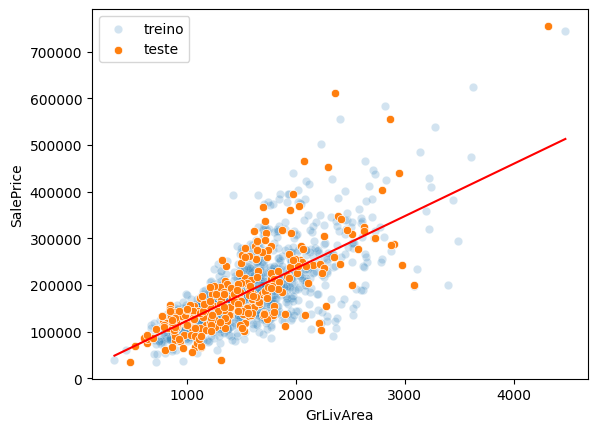

In [ ]:
sns.scatterplot(x=X_train["GrLivArea"], y=y_train, label="treino", alpha=0.2)  # alpha transparente
sns.scatterplot(x=X_test["GrLivArea"], y=y_test, label="teste")

b0, b1 = modelo.intercept_, modelo.coef_[0]   # visualizando a melhor reta
x = np.linspace(X_train["GrLivArea"].min(), X_train["GrLivArea"].max(), 2)
y = b0 + b1*x
plt.plot(x, y, color="red")

plt.show()

É raro que consigamos visualizar nosso modelo final como fizemos acima, mas no caso da regressão linear simples, temos essa sorte! :)

Vamos agora fazer algumas previsões!

In [ ]:
b0, b1 = modelo.intercept_, modelo.coef_[0]

x = 3000     # se chegar uma casa nova com 3000 de área, pega o valor dela em X e aplica na reta
y = b0 + b1*x

y  # preço estimado

347270.8925258354

Ou ainda:

In [ ]:
modelo.predict([[x]])  # com o método predict pra fazer uma predição

array([347270.89252584])

Predizendo vários valores de uma vez (muito mais comum)

In [ ]:
X_test_1d = X_test["GrLivArea"]  # uma dimensão novamente agora com o teste

In [ ]:
modelo.predict(X_test_1d.values.reshape(-1, 1))[:5]  # usando o .predict, to fazendo uma predição pra cada uma das casas na base de TESTE e esses resultados foi o modelo que me deu

array([130645.06248705, 304887.57795303, 126160.05565395, 197471.66430026,
       192538.15678385])

In [ ]:
y_test.iloc[:5].values # agora comparando com os valores reais da base de teste

array([154500, 325000, 115000, 159000, 315500])

In [ ]:
X_test_1d.iloc[:5].values # feature de teste

array([1068, 2622, 1028, 1664, 1620])

- Alguns valores de previsão de venda da casa ficaram diferentes dos valores de reais, então é interessante avaliar o modelo!

Próxmo passo!

____________

## 3) Avaliação de modelos de regressão

> ### Passo 2 - avaliação do modelo

Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

É nesse momento que entra em jogo a **base de teste**!

Conheceremos agora algumas **métricas de avaliação**, que são medidas quantitativas para, de uma forma ou de outra, **comparar os targets reais com os targets preditos**.

> Existem várias métricas de avaliação diferentes, e cada uma avalia **um aspecto particular** da performance do modelo.

> Problemas de regressão e classificação admitem métricas de avaliação diferentes, dada a diferença entre os targets (contínuo vs discreto).

Ao analisarmos estas métricas **calculadas na base de teste**, podemos ter uma ideia boa sobre o **poder de generalização** de nosso modelo, pois estaremos efetivamente testando o modelo com **observações que não foram utilizadas em sua construção!**

<img src="https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2012/07/mod10-big_picture_inference.gif" width=400>

Obs.: até podemos calcular as métricas de avaliação na base de treino, mas o propósito desse cálculo **não é a avaliação da generalização**. Veremos mais a frente em que contextos vale a pena calcularmos as métricas na base de treino. Mas, antes, vamos conhecer quais são as principais métricas!

Vamos conhecer algumas métricas para problemas de regressão!

Em problemas de regressão, é uma boa ideia dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que **os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!** Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

Rearranjando os termos, podemos escrever a equação acima como:

$$ \hat{y}_i= y_i - R(y_i)  $$

Perceba, portanto, que um modelo perfeito (o que, lembre-se, é virtualmente impossível, e não o que queremos!), seria tal que $\hat{y}_i= y_i$. Podemos visualizar este caso:

In [ ]:
y_pred = modelo.predict(X_test_1d.values.reshape(-1, 1))    # predições de todos os elementos da base de teste

In [ ]:
residuos = y_test - y_pred  # valores reais - valores preditos

In [ ]:
residuos   # modelo errou 23+ , 20+, -11 ...

,SalePrice
892,23854.937513
1105,20112.422047
413,-11160.055654
522,-38471.664300
1036,122961.843216
...,...
479,-48237.948249
1361,77553.108591
802,14850.371232
651,-72204.387993


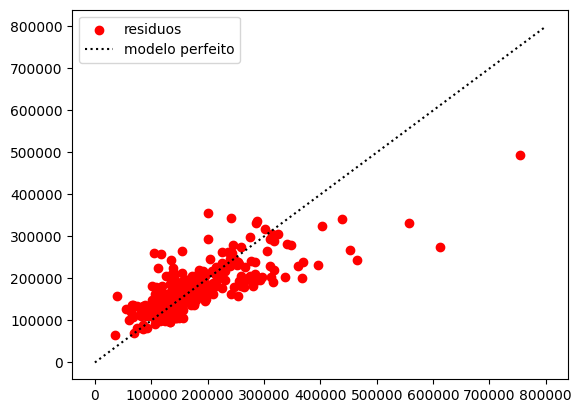

In [ ]:
plt.scatter(x=y_test, y=y_pred, color="r", label="residuos")  # plotando os resíduos

x = np.linspace(0, 800000, 2)
y = x
plt.plot(x, y, color="k", ls=":", label="modelo perfeito")

plt.legend()
plt.show()

O caso 100% perfeito (na prática, impossível) seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas temos que tomar muito cuidado com a forma como interpretaremos esta métrica! Discutiremos mais a diante a importância de calcularmos as métricas de avaliação também na base de treino.

Por enquanto, vamos calcular o $R^2$ nos dados de teste apenas, como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**

Então, quanto mais próximo de 1, melhor o modelo!

In [ ]:
from sklearn.metrics import r2_score  # importando o R² que representa o quão próximos os dados estão da reta ajustada

r2_score(y_test, y_pred) # quanto mais próximo de 1 tem menos residuos, e é melhor!

0.5675383176324451

Outra coisa importante é que os resíduos sejam normalmente distribuídos (isso faz parte das premissas da visão mais estatística da regressão linear). Se esse não for o caso, pode ser importante que você reveja se a regressão linear de fato é um modelo adequado ao seu problema.

Mas, de maneira mais genérica, é interessante avaliarmos a **distribuição dos resíduos** para termos uma ideia da distribuição dos erros.

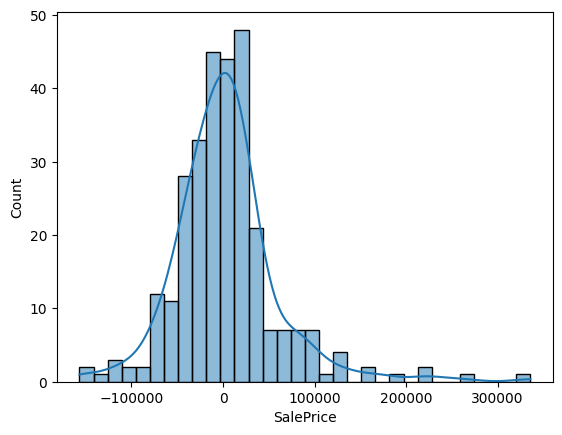

In [ ]:
sns.histplot(x=residuos, kde=True);  # distribuição dos resíduos

In [ ]:
residuos.describe()

,SalePrice
count,292.000000
mean,3376.936012
std,57594.082477
min,-156822.385818
25%,-29205.512403
50%,-176.809412
75%,22218.204254
max,335697.716120


In [ ]:
residuos.skew()

1.428337811855939

Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean absolute percentage error** (MAPE) é o erro absoluto médio relativo ao valor real dos targets:

$$\frac 1n\sum_{i=1}^n \left | \frac{y_i-\hat{y}_i}{y_i} \right| $$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é a métrica mais popular, pois essa métrica penaliza mais erros maiores, o que faz mais sentido na maior parte das aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.
- **MAPE** penaliza mais resíduos negativos (isto é, erros pra cima) do que residuos positivos (erros pra baixo).
    - $y_i = 100$ e $\hat{y}_i = 150$ (erro pra cima). Temos: $\text{MAPE} = \left | \frac{100 - 150}{100} \right| = 50 \%$
    - $y_i = 200$ e $\hat{y}_i = 150$ (erro pra baixo). Temos: $\text{MAPE} = \left | \frac{200 - 150}{200} \right| = 25 \%$

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

Inclusive, já conhecemos uma delas: O MSE, que é usado como função de custo para o OLS!

Vamos dar uma olhada em tudo junto:


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)  # ERRO ABSOLUTO p/ cima ou p/ baixo
MSE = mean_squared_error(y_test, y_pred)  # MSE é mt ruim de visualizar pq é mt grande o numero MSE = 3317122175.86809
RMSE = np.sqrt(MSE)  # raiz quadrada do MSE, ERRO QUADRATICO MÉDIO
MAPE = mean_absolute_percentage_error(y_test, y_pred)  # %

In [ ]:
print(f"MAE = {MAE:.2f}\nRMSE = {RMSE:.2f}\nMAPE = {MAPE:.2%}")

MAE = 38473.84
RMSE = 57594.46
MAPE = 23.34%


In [ ]:
y_train.describe()

,SalePrice
count,1166.000000
mean,181457.093482
std,77327.262158
min,34900.000000
25%,130000.000000
50%,165000.000000
75%,214975.000000
max,745000.000000


E é isso, passamos pela primeira vez pelo ciclo de modelagem! Muito legal, não é mesmo?

Mas, claro, é difícil de acreditar que um modelo tão simples, com uma única feature, é o melhor que podemos fazer.

Que tal fazermos algumas mudanças? Vamos entrar no ciclo!

___
___
___

In [ ]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


## 3) Regressão linear múltipla

O modelo que fizemos acima considera uma única feature como preditora do preço da casa.

Mas temos outras 78 dessas features! Será que não há mais informação útil em todas essas outras variáveis?

Em geral, sim! É natural que esperemos que **mais variáveis** tragam **mais informações** ao modelo, e, portanto, o torne mais preciso! (embora, como veremos, não é verdade necessariamente que mais features nos deem um melhor modelo, em todos os casos).

Para incorporar estas outras variáveis ao modelo, é muito simples!

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, cuja função que representa o modelo é:

$$ \hat{y} = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos!

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

O OLS também é válido para a regressão linear múltipla, mas o fato de termos muitas variáveis faz com que os cálculos do problema de otimização sejam consideravelmente mais complicados.

Para facilitar este procedimento, é muito comum utilizarmos uma **notação matricial**, que facilita muitíssimo o cálculo do problema de otimização. Para os interessados, sugiro as referências, ou então [esta lecture](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf).

Vamos construir esse modelo na prática com o sklearn!

Lembrando que podemos apenas passar pro sklearn **dados numéricos** e **preenchidos** (sem NaNs)!

In [ ]:
X_train   # todas as variaveis incluindo nao numericas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [ ]:
X_train.select_dtypes(include=np.number).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166 entries, 254 to 1126
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1166 non-null   int64  
 1   MSSubClass     1166 non-null   int64  
 2   LotFrontage    949 non-null    float64
 3   LotArea        1166 non-null   int64  
 4   OverallQual    1166 non-null   int64  
 5   OverallCond    1166 non-null   int64  
 6   YearBuilt      1166 non-null   int64  
 7   YearRemodAdd   1166 non-null   int64  
 8   MasVnrArea     1160 non-null   float64
 9   BsmtFinSF1     1166 non-null   int64  
 10  BsmtFinSF2     1166 non-null   int64  
 11  BsmtUnfSF      1166 non-null   int64  
 12  TotalBsmtSF    1166 non-null   int64  
 13  1stFlrSF       1166 non-null   int64  
 14  2ndFlrSF       1166 non-null   int64  
 15  LowQualFinSF   1166 non-null   int64  
 16  GrLivArea      1166 non-null   int64  
 17  BsmtFullBath   1166 non-null   int64  
 18  BsmtHalfBat

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number).drop(columns="Id")  #trouxe só as features numericas e excluiu a coluna Id

In [ ]:
X_train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,294,250,0,0,0,0,0,0,6,2010
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,380,0,40,0,0,0,0,0,5,2009
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,328,0,164,0,0,0,0,5,2008
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,240,0,0,264,0,0,0,0,6,2007
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,308,0,0,242,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,78.0,9317,6,5,2006,2006,0.0,24,0,...,440,0,22,0,0,0,0,0,3,2007
1130,50,65.0,7804,4,3,1928,1950,0.0,622,0,...,576,431,44,0,0,0,0,0,12,2009
1294,20,60.0,8172,5,7,1955,1990,0.0,167,0,...,572,0,0,0,0,0,0,0,4,2006
860,50,55.0,7642,7,8,1918,1998,0.0,0,0,...,216,0,240,0,0,0,0,0,6,2007


In [ ]:
X_train.select_dtypes(include=np.number).drop(columns="Id").isnull().sum()  #verificando a quantidade de valores nulos

,0
MSSubClass,0
LotFrontage,217
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,6
BsmtFinSF1,0
BsmtFinSF2,0


In [ ]:
X_train_num.dropna(axis=0)   # excluindo valores nulos

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,294,250,0,0,0,0,0,0,6,2010
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,380,0,40,0,0,0,0,0,5,2009
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,240,0,0,264,0,0,0,0,6,2007
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,308,0,0,242,0,0,0,0,5,2010
303,20,70.0,9800,5,7,1972,1972,0.0,894,0,...,552,256,0,0,0,0,0,0,7,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,78.0,9317,6,5,2006,2006,0.0,24,0,...,440,0,22,0,0,0,0,0,3,2007
1130,50,65.0,7804,4,3,1928,1950,0.0,622,0,...,576,431,44,0,0,0,0,0,12,2009
1294,20,60.0,8172,5,7,1955,1990,0.0,167,0,...,572,0,0,0,0,0,0,0,4,2006
860,50,55.0,7642,7,8,1918,1998,0.0,0,0,...,216,0,240,0,0,0,0,0,6,2007


In [ ]:
X_train_num_full = X_train_num.dropna(axis=1)  # axis0 deleta todas que tem pelo menos um valor nulo, axis1 deleta as colunas que tem valores nulos, no caso 3 colunas

In [ ]:
X_train_num_full.info()  # tudo preenchido e tudo numerico, então tudo ok pro modelo!

<class 'pandas.core.frame.DataFrame'>
Index: 1166 entries, 254 to 1126
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1166 non-null   int64
 1   LotArea        1166 non-null   int64
 2   OverallQual    1166 non-null   int64
 3   OverallCond    1166 non-null   int64
 4   YearBuilt      1166 non-null   int64
 5   YearRemodAdd   1166 non-null   int64
 6   BsmtFinSF1     1166 non-null   int64
 7   BsmtFinSF2     1166 non-null   int64
 8   BsmtUnfSF      1166 non-null   int64
 9   TotalBsmtSF    1166 non-null   int64
 10  1stFlrSF       1166 non-null   int64
 11  2ndFlrSF       1166 non-null   int64
 12  LowQualFinSF   1166 non-null   int64
 13  GrLivArea      1166 non-null   int64
 14  BsmtFullBath   1166 non-null   int64
 15  BsmtHalfBath   1166 non-null   int64
 16  FullBath       1166 non-null   int64
 17  HalfBath       1166 non-null   int64
 18  BedroomAbvGr   1166 non-null   int64
 19  KitchenAb

In [ ]:
modelo_full = LinearRegression().fit(X_train_num_full, y_train)

Vamos olhar para os parâmetros do modelo:

In [ ]:
modelo_full.intercept_   # b0

-716527.4382439618

In [ ]:
modelo_full.coef_  # os outros b's da reta até bn

array([-1.26375182e+02,  5.32994082e-01,  1.52872496e+04,  4.57913246e+03,
        4.05105414e+02,  1.82715322e+02,  2.51221840e+01, -4.47075182e+00,
        1.36568464e+00,  2.20171168e+01,  2.27592477e+01,  2.93947729e+01,
       -1.22078395e+01,  3.99461812e+01,  1.63581381e+03, -5.77973247e+03,
       -3.10496297e+03, -3.74510912e+03, -1.25577334e+04, -1.26441896e+04,
        4.29293599e+03,  1.42303597e+03,  1.63552631e+03,  2.14474628e+01,
        1.02525626e+01,  1.33477038e+01,  1.39595880e+00,  2.09349758e+01,
        3.79580386e+01,  6.26625954e+01, -1.73306325e+00, -3.41476788e+02,
       -2.48959241e+02])

In [ ]:
modelo_full.feature_names_in_  # listando os nomes das features

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [ ]:
modelo_full.coef_.shape  # 33 features no total

(33,)

In [ ]:
pd.DataFrame(modelo_full.coef_, index=modelo_full.feature_names_in_, columns=["Parâmetro"])  # cria-se um DF com os dados das features, nomes das features e uma coluna de nome "Parametros"

,Parâmetro
MSSubClass,-126.375182
LotArea,0.532994
OverallQual,15287.249591
OverallCond,4579.132457
YearBuilt,405.105414
YearRemodAdd,182.715322
BsmtFinSF1,25.122184
BsmtFinSF2,-4.470752
BsmtUnfSF,1.365685
TotalBsmtSF,22.017117


In [ ]:
lista_string = []
for feature, parametro in zip(modelo_full.feature_names_in_, modelo_full.coef_):  # com o zip consigo fazer uma interação entre duas variaveis, por exemplo, b1 x1, b2 x2... (features name, coef)
    lista_string.append(f"{parametro:.2f}*{feature}")  # b*x

string_soma_termos = " + ".join(lista_string)

In [ ]:
string_soma_termos

'-126.38*MSSubClass + 0.53*LotArea + 15287.25*OverallQual + 4579.13*OverallCond + 405.11*YearBuilt + 182.72*YearRemodAdd + 25.12*BsmtFinSF1 + -4.47*BsmtFinSF2 + 1.37*BsmtUnfSF + 22.02*TotalBsmtSF + 22.76*1stFlrSF + 29.39*2ndFlrSF + -12.21*LowQualFinSF + 39.95*GrLivArea + 1635.81*BsmtFullBath + -5779.73*BsmtHalfBath + -3104.96*FullBath + -3745.11*HalfBath + -12557.73*BedroomAbvGr + -12644.19*KitchenAbvGr + 4292.94*TotRmsAbvGrd + 1423.04*Fireplaces + 1635.53*GarageCars + 21.45*GarageArea + 10.25*WoodDeckSF + 13.35*OpenPorchSF + 1.40*EnclosedPorch + 20.93*3SsnPorch + 37.96*ScreenPorch + 62.66*PoolArea + -1.73*MiscVal + -341.48*MoSold + -248.96*YrSold'

In [ ]:
print(f"y = {modelo_full.intercept_:.2f} + {string_soma_termos}")  # equação final

y = -716527.44 + -126.38*MSSubClass + 0.53*LotArea + 15287.25*OverallQual + 4579.13*OverallCond + 405.11*YearBuilt + 182.72*YearRemodAdd + 25.12*BsmtFinSF1 + -4.47*BsmtFinSF2 + 1.37*BsmtUnfSF + 22.02*TotalBsmtSF + 22.76*1stFlrSF + 29.39*2ndFlrSF + -12.21*LowQualFinSF + 39.95*GrLivArea + 1635.81*BsmtFullBath + -5779.73*BsmtHalfBath + -3104.96*FullBath + -3745.11*HalfBath + -12557.73*BedroomAbvGr + -12644.19*KitchenAbvGr + 4292.94*TotRmsAbvGrd + 1423.04*Fireplaces + 1635.53*GarageCars + 21.45*GarageArea + 10.25*WoodDeckSF + 13.35*OpenPorchSF + 1.40*EnclosedPorch + 20.93*3SsnPorch + 37.96*ScreenPorch + 62.66*PoolArea + -1.73*MiscVal + -341.48*MoSold + -248.96*YrSold


In [ ]:
def calc_metricas_regressao(y_test, y_pred, plot=True):        # função pra calcular as métricas todas juntas logo. O plot true para mostrar o grafico

    if plot:
        plt.figure(figsize=(12, 5))                             # aumenta o tamanho do grafico

        plt.subplot(121)                                        # mostrar os graficos lado a lado
        plt.scatter(x=y_test, y=y_pred, color="r", label="residuos")  # mostrando os resíduos (y_test-y_pred)

        x = np.linspace(0, 800000, 2)
        y = x
        plt.plot(x, y, color="k", ls=":", label="modelo perfeito")

        plt.legend()

        plt.subplot(122)
        plt.title("Distribuição de resíduos")
        sns.histplot(x=(y_test-y_pred), kde=True)

        plt.show()

    # ==============================

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    r2 = r2_score(y_test, y_pred)

    print(f"MAE = {MAE:.2f}\nRMSE = {RMSE:.2f}\nMAPE = {MAPE:.2%}\nR^2 = {r2:.2f}")

In [ ]:
# mostrando o desempenho do modelo com uma feature, GrLivArea

# estabelece os dados de treino e teste
X_train_num_1d = X_train["GrLivArea"].values.reshape(-1, 1)
X_test_num_1d = X_test["GrLivArea"].values.reshape(-1, 1)

# passo 1   # treina o modelo
modelo_1d = LinearRegression().fit(X_train_num_1d, y_train)

# passo 2  # avalia o modelo
y_pred = modelo_1d.predict(X_test_num_1d)

calc_metricas_regressao(y_test, y_pred, plot=False)  # false é nao plotar o grafico, opcional

MAE = 38473.84
RMSE = 57594.46
MAPE = 23.34%
R^2 = 0.57


In [ ]:
# mostrando o desempenho do modelo agora com as demais features, 33 ao total

# passo 1
modelo_full = LinearRegression().fit(X_train_num_full, y_train)

# passo 2
X_test_num_full = X_test[X_train_num_full.columns]

y_pred = modelo_full.predict(X_test_num_full)

calc_metricas_regressao(y_test, y_pred, plot=False)   # MAPE caiu pra 13.35%, quanto maior o R^2 melhor

MAE = 22079.30
RMSE = 34605.80
MAPE = 13.35%
R^2 = 0.84


__________

A performance do modelo melhorou?

Será que dá pra melhorar mais?

Opções:

- tentar apenas um subconjunto de features: **feature selection**;

- passar a utilizar as features categóricas, ou então criar novas features: **feature engeneering**;

- Usar estimadores diferentes da regressão linear (quem sabe, métodos não-lineares?).

Isso, e muito mais, aprenderemos nas próximas aulas do curso! :D

____
____
____

## 4) Overfitting: um dos lados do tradeoff viés-variância

O famoso **tradeoff viés-variância** é um dos conceitos mais importantes em apredizado de máquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**.

Quando isso ocorre, dizemos que nosso modelo sofre de **overfitting**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**.

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

E é essa a grande vantagem em calcularmos as métricas de avaliação tanto na base de treino quanto na base de teste:

- analisando a **diferença entre estas métricas**, conseguimos facilmente inferir se houve overfitting (o que acontece quando há uma grande diferença entre as métricas de treino e de teste);

- identificar underfitting é algo um pouco mais sensível, e tem muito mais a ver com a expectativa que temos de performance para aquele modelo. Acontece também quando temos as métricas de teste melhores que as de treino (o que tipicamente ocorre para modelos que sofrem de overfitting e são avaliados em bases de teste relativamente pequenas).

Por isso, daqui pra frente, vamos sempre criar o hábito de calcular e analisar as métricas de avaliação em ambas as bases!

> Mas nunca se esqueça que **para a avaliação da performance de generalização do modelo**, são as métricas de **teste** que devemos analisar!

Mas é legal calcularmos as métricas de treino para podermos avaliar o gap:

In [ ]:
def calc_metricas_regressao(y_true, y_pred, tipo, plot=True):

    if plot:
        plt.figure(figsize=(12, 5))

        plt.subplot(121)
        plt.scatter(x=y_true, y=y_pred, color="r", label="residuos")

        x = np.linspace(0, 800000, 2)
        y = x
        plt.plot(x, y, color="k", ls=":", label="modelo perfeito")

        plt.legend()

        plt.subplot(122)
        plt.title("Distribuição de resíduos")
        sns.histplot(x=(y_true-y_pred), kde=True)

        plt.show()

    # ==============================

    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)

    r2 = r2_score(y_true, y_pred)

    print(f"Métricas de {tipo}:\n\nMAE = {MAE:.2f}\nRMSE = {RMSE:.2f}\nMAPE = {MAPE:.2%}\nR^2 = {r2:.2f}")

In [ ]:
def calc_metricas_reg_train_test(modelo, X_train, X_test, y_train, y_test, plot=True):

    y_pred_train = modelo.predict(X_train)
    calc_metricas_regressao(y_train, y_pred_train, "treino", plot)

    print("\n=========================\n")

    y_pred_test = modelo.predict(X_test)
    calc_metricas_regressao(y_test, y_pred_test, "teste", plot)

In [ ]:
# passo 1
modelo_full = LinearRegression().fit(X_train_num_full, y_train)

# passo 2
X_test_num_full = X_test[X_train_num_full.columns]

calc_metricas_reg_train_test(modelo_full, X_train_num_full, X_test_num_full, y_train, y_test, plot=False)

Métricas de treino:

MAE = 19590.38
RMSE = 28201.69
MAPE = 12.00%
R^2 = 0.87


Métricas de teste:

MAE = 22079.30
RMSE = 34605.80
MAPE = 13.35%
R^2 = 0.84


__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente quando começarmos a lidar com modelos mais complexos, com maior capacidade de caputrar relações não lineares.

Na prática: **jamais se apegue à peformance de treino como forma de avaliar o modelo!** Sim, devemos calcular as métricas de treino para compará-las com as de teste, mas nossa estimativa de generalização só pode ser feita com base nas predições de teste!

O que queremos otimizar sempre será a performance **avaliada nos dados de teste**, isto é, a **performance de generalização** do modelo.

Assim, é **avaliando o modelo nos dados de teste** que garantimos que uma boa performance não é produto do overfitting!

Mais a diante, aprenderemos como transitar entre os regimes de under e overfitting.

Por enquanto, uma boa prática é comparar as métricas de treino com as métricas de teste, conforme fizemos acima. Isso nos permite avaliar, de maneira rápida e simples, se houve underfitting!